# Wahab Jupyter Demo: Data Analysis with Pandas

2020-09-14

> *This notebook was derived from `BigData-session-1.ipynb`, dated 2020-08-11, from the **DeapSECURE** training project. See the end of this notebook if you want to learn more and obtain the original notebook.
> Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.*

In [1]:
import os
## BOILERPLATE: Detect where we are running. Most users don't need to worry about this code.
try:
    with open("/etc/cluster", "r") as F: _CLUSTER = F.read().strip()
    if os.path.isdir("/.singularity.d"):
        _SUITE = "container"
    else:
        _SUITE = "legacy"
except:
    _CLUSTER = None
    _SUITE = None
    def module(*argv, **args):
        from warnings import warn
        warn("Module command not supported")

### 1.1 Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 
* To run a code in a cell, press `Shift+Enter`.
* Use `ls` to view the contents of a directory.

### Loading Python Libraries

We need to **import** the required libraries into this Jupyter notebook:
`pandas`, `numpy`, `matplotlib` and `seaborn`.


#### Case 1: Legacy Python

On the **Legacy** Python suite environment, Python libraries are made available by loading the *environment modules*:

| Python library     | Environment module name |
|--------------------|-------------------------|
| `pandas`           | `py-pandas`             |
| `numpy`            | `py-numpy`              |
| `matplotlib`       | `py-matplotlib`         |
| `seaborn`          | `py-seaborn`            |

Before we can `import` the Python libraries into our current notebook, we have to load the corresponding environment modules.

> Note the names of the environment modules are usually the same as the name of the Python library with `py-` added.

* Load the modules above using the `module("load", "MODULE")` or `module("load", "MODULE1", "MODULE2", "MODULE n")` statement.
* Next, invoke `module("list")` to confirm that these modules are loaded.

In [2]:
"""Modify and uncomment statements below to load the required environment modules""";

#module("load", "#TODO")
module("load", "py-pandas", "py-numpy", "py-matplotlib", "py-seaborn")

you are running containerized python, module load is not compatible


In [3]:
"""Confirm the loaded modules""";
module("list")

you are running containerized python, module load is not compatible


You can see the available modules using `module("avail")` command.

In [4]:
module( "avail")

you are running containerized python, module load is not compatible


#### Case 2: Containerized Python

Our newer Python distributions and machine learning tools on Wahab are packaged as "containers", which already comes with many popular Python libraries, including `numpy`, `pandas`, and `matplotlib`. But `seaborn` is not provided in the container by default. You can install `seaborn`, as well as other Python libraries, to your home directory, by following the instructions in our <a href="https://wiki.hpc.odu.edu/Software/Python" target="_blank">Python wiki page</a>:

1. First, create a virtual environment
2. Install the needed libraries in that virtual environment
3. Include that virtual environment when launching the Jupyter session (the **Additional Module Directory**)

> Here is the sample sequence of commands to be run from <a href="https://wiki.hpc.odu.edu/GettingStarted" target="_blank">Wahab's terminal (e.g. ssh)</a> to install `seaborn` to a virtual environment named `MY_ANALYSIS`:
>
> ~~~
> $ module load container_env tensorflow-cpu
> $ crun.tensorflow-cpu -p ~/envs/MY_ANALYSIS -c
> $ crun.tensorflow-cpu -p ~/envs/MY_ANALYSIS pip install seaborn
> ~~~
>
> Launch Jupyter using the "tensorflow CPU" Python suite and including `~/envs/MY_ANALYSIS` module directory. Now the extra libraries will become available in your Jupyter session without the need of invoking the `module` command.

In [5]:
# For containerized Python, nothing to add here

Now we can import the following Python libraries:
`pandas`, `numpy`, `pyplot` (a submodule of `matplotlib`), and `seaborn`.

In [6]:
"""Uncomment, edit, and run code below to import libraries""";
import pandas
import numpy
from matplotlib import pyplot
import seaborn
%matplotlib inline

In [7]:
# You can check where seaborn package comes from:
seaborn

<module 'seaborn' from '/home/wpurwant/envs/toy1/lib/python3.7/site-packages/seaborn/__init__.py'>

The last line is an ipython magic command to ensure that plots are rendered inline.

## Data in Pandas: `Series` and `DataFrame`

<table style="width:100%">
    <tr>
        <th style="width:33%">Series</th>
        <th style="width:67%">DataFrame</th>
    </tr>
    <tr>
        <td>1-D labeled array of values</td>
        <td>2-D tabular data with row and column labels</td>
    </tr>
    <tr>
        <td><img src="fig/Series.png"></td>
        <td><img src="fig/DataFrame.png"></td>
    </tr>
    <tr>
        <td>
            Properties: <b>labels</b>, <b>values</b>, <b>data type</b>
       </td>
        <td>
            Properties: <b>(row) labels</b>, <b>column names</b>,
            <b>values</b>, <b>data type</b>
       </td>
    </tr>
</table>

<a id="sec-DataFrame"></a>[(back to top)](#TOC)
## Working with `DataFrame`

Things are much more interesting when we work with table-like `DataFrame` data structures.
Similar to the `Series` hands-on above,
we will begin by creating `DataFrame` objects, then learn to access and modify elements of a `DataFrame`.
In the next section (the next notebook) we will learn how we can automate data processing using _pandas_.

### Creating a `DataFrame` Object

A `DataFrame` object can be created from a variety of inputs:

* a nested list (i.e., a list of lists),
* a dict of lists,
* a JSON (Javascript Object Notation) file,
* CSV (Comma Separated Values) file,

and many other ways.
For this notebook, we will limit ourselves to two ways: (1) a nested list, and (2) a CSV file.

#### Reading Data from a CSV File

When performing data analytics with _pandas_, data is usually read from an external file, instead of embedded in the notebook or the script.
This becomes an absolute necessity when handling large sizes of data.
The CSV format is frequently used because it is straightforward to make and comprehend.
It is a plain text file where two adjacent fields are separated by a comma character.
_pandas_ provides the `pandas.read_csv()` function to load data from a CSV file to a `DataFrame`.

<a id="sec-Sherlock-load-tiny"></a>
### Loading Sherlock Data

In the `sherlock` subdirectory, we have prepared a tiny subset of the Sherlock's "Application" dataset in a file named `sherlock_mystery.csv`.
Let us load that data into an object named `df_mystery` and print the contents.

> **IMPORTANT**: Make sure that you read this data file at this point in order to do the subsequent exercises!

In [8]:
df_mystery = pandas.read_csv("sherlock/sherlock_mystery.csv")

In [9]:
"""Display the conntents of df_mystery""";
df_mystery

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.0
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.0
2,9772,WhatsApp,0.23,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.0
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.0
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,776470,Facebook,0.40,0.0,0,178,75104,20,11020.0,2483150848,0.0,545.926305,2483150848,100.0
196,776474,WhatsApp,0.26,1.0,0,57,15840,20,6938.0,2094870528,501.0,344.944906,2094870528,100.0
197,779599,Facebook,0.39,0.0,0,178,78648,20,11714.0,2482655232,0.0,584.140036,2482655232,100.0
198,784035,Facebook,0.15,0.0,0,18,2916,20,5450.0,2123321344,0.0,267.732926,2123321344,100.0


#### Initial `DataFrame` Exploration

**QUESTIONS:** When working with a new dataset, we always ask a lot of questions to familiarize ourselves with it. For example:

* How many columns and rows exist in this dataset?
* What columns are available in the dataset?
* What does the data look like? Can we learn some characteristics about the data?

A `DataFrame` has a lot of handy methods and attributes which help us know our new dataset. Use attributes like `shape`, and methods like `info`, `size`, `describe`, `head`, `tail`.

The `head` and `tail` functions provide a handy way to print only a few records at the beginning and end of a `DataFrame`, respectively:

In [10]:
print(df_mystery.shape)

(200, 14)


In [11]:
print(df_mystery.columns)

Index(['Unnamed: 0', 'ApplicationName', 'CPU_USAGE', 'cutime', 'lru',
       'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize',
       'cminflt', 'guest_time', 'Mem', 'queue'],
      dtype='object')


In [12]:
"""Print a specified number of first rows (10)""";
df_mystery.head(10)

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.000000
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.000000
2,9772,WhatsApp,0.23,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.000000
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.000000
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.000000
5,22236,Facebook,4.99,0.0,0,111,19688,14,460.0,2272055296,NaN,17.092659,2272055296,121.428571
6,26568,Facebook,0.23,0.0,0,111,2420,14,1243.0,2275667968,NaN,59.467658,2275667968,121.428571
7,27831,WhatsApp,0.47,1.0,0,55,33944,20,4200.0,2085740544,NaN,205.777315,2085740544,100.000000
8,28005,WhatsApp,0.46,1.0,0,55,33904,20,4204.0,2085740544,NaN,207.103771,2085740544,100.000000
9,29816,Facebook,0.17,0.0,0,111,3044,14,1572.0,2276429824,NaN,74.294757,2276429824,121.428571


In [13]:
#RUNIT
df_mystery.head(10)

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.000000
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.000000
2,9772,WhatsApp,0.23,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.000000
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.000000
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.000000
5,22236,Facebook,4.99,0.0,0,111,19688,14,460.0,2272055296,NaN,17.092659,2272055296,121.428571
6,26568,Facebook,0.23,0.0,0,111,2420,14,1243.0,2275667968,NaN,59.467658,2275667968,121.428571
7,27831,WhatsApp,0.47,1.0,0,55,33944,20,4200.0,2085740544,NaN,205.777315,2085740544,100.000000
8,28005,WhatsApp,0.46,1.0,0,55,33904,20,4204.0,2085740544,NaN,207.103771,2085740544,100.000000
9,29816,Facebook,0.17,0.0,0,111,3044,14,1572.0,2276429824,NaN,74.294757,2276429824,121.428571


The `describe()` function provides the statistical information about all the numerical columns (we transposed it to ease the reading):

In [14]:
"""Apply describe() to df_mystery and observe the output:""";
df_mystery.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,4.004174e+05,2.363250e+05,4.340000e+02,1.918928e+05,3.900475e+05,6.266752e+05,7.867810e+05
CPU_USAGE,200.0,2.247500e-01,4.175316e-01,0.000000e+00,8.000000e-02,1.600000e-01,2.700000e-01,4.990000e+00
cutime,200.0,4.200000e-01,9.262232e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
lru,200.0,7.500000e-02,1.060660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
num_threads,200.0,7.136500e+01,4.559954e+01,1.100000e+01,4.900000e+01,6.200000e+01,9.875000e+01,1.900000e+02
otherPrivateDirty,200.0,2.042628e+04,2.332322e+04,3.200000e+01,2.826000e+03,1.355200e+04,2.999300e+04,1.149720e+05
priority,200.0,1.973000e+01,1.146154e+00,1.400000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
utime,200.0,4.224705e+03,5.493086e+03,2.300000e+01,5.597500e+02,2.238500e+03,6.457000e+03,3.461500e+04
vsize,200.0,2.175793e+09,1.417478e+08,1.983623e+09,2.095809e+09,2.107628e+09,2.252854e+09,2.633560e+09
cminflt,152.0,2.976316e+02,4.182055e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.130000e+02,1.550000e+03


In [15]:
df_mystery[df_mystery['num_threads'] > 150]

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
38,140981,Facebook,0.34,0.0,0,187,48672,20,34199.0,2630475776,NaN,1706.490293,2630475776,100.0
39,143039,Facebook,0.34,0.0,0,190,45864,20,34465.0,2633560064,NaN,1721.494350,2633560064,100.0
40,144350,Facebook,0.33,0.0,0,187,25384,20,34615.0,2630823936,NaN,1725.901364,2630823936,100.0
123,485699,Facebook,0.19,0.0,0,157,55352,20,7583.0,2524213248,0.0,374.845582,2524213248,100.0
124,488984,Facebook,0.18,0.0,0,157,56560,20,7712.0,2524786688,0.0,380.182041,2524786688,100.0
126,502307,Facebook,0.16,0.0,0,160,55520,20,8593.0,2528825344,0.0,427.680339,2528825344,100.0
127,504887,Facebook,0.16,0.0,0,160,54588,20,8780.0,2528043008,0.0,434.635280,2528043008,100.0
144,608887,Facebook,0.58,0.0,0,152,114972,20,8606.0,2490462208,0.0,426.040946,2490462208,100.0
145,609358,Facebook,0.56,0.0,0,152,114572,20,8613.0,2490544128,0.0,427.384674,2490544128,100.0
149,626522,Facebook,0.38,0.0,0,156,86704,20,12715.0,2514665472,0.0,632.928504,2514665472,100.0


### Raw Data Plot

Pandas makes it easy to plot the sequence of raw data points:

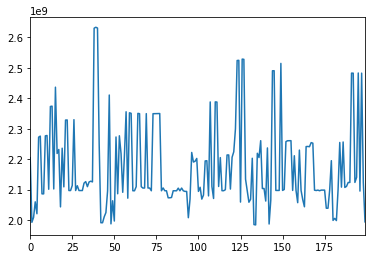

In [16]:
df_mystery['vsize'].plot()

### Box-and-whisker Plot 

Visualizing the descriptive statistics comes in handy when analyzing data.
A box-and-whisker plot (often shortened "box plot") provides a concise, graphical depiction of the minimum, maximum, median, and quartiles of the values from a set of values.
Khan academy has
<a href="https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots" target="_blank">a tutorial video</a> that explains
all the parts of a box-and-whisker plot.

How to do this for the `vsize` column? Simply change the `kind='line'` to `kind='box'` in the plot statement above, and you're all set!

**QUESTION**: Draw the box-and-whisker plot for the `vsize` column and compare the result with the descriptive statistics above.

* Where is the median (`50%`) in this graph?
* Where are the `25%` and `75%` percentiles in this graph?
* Where are the `min` and `max` in this graph?

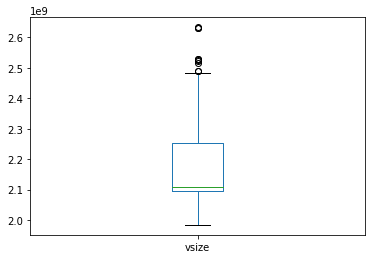

In [17]:
"""Uncomment and modify to draw a box plot of the 'vsize' data""";

df_mystery['vsize'].plot(kind='box')

### Visualization with `Seaborn`

**Seaborn** visualization package can produce similar plots to what _pandas_ alone can make, but with a much more robust set of capabilities and better aesthetics.
Let's try an example here for the box plot:

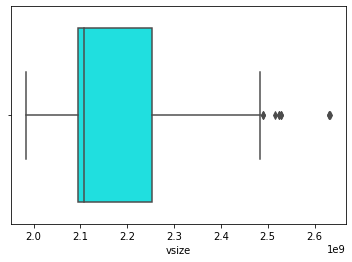

In [18]:
"""Uncomment and modify to draw a box plot of 'vsize'""";

seaborn.boxplot(x=df_mystery['vsize'], color='cyan')

<a id="sec-Summary" href="#TOC">(back to top)</a>
## Summary & Further Resources

### Pandas

#### Important Notes on DataFrame Indexing

In a DataFrame, the `.loc[]` operator is the only way to select specific row(s) by the labels, as the `[]` operator is reserved to select only column(s).
The `.loc[]` operator can also be used to write new values to particular location(s) in the DataFrame.

#### References & Cheatsheets

* Our lesson page has a [summary table of the commonly used indexing syntax](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-indexing-syntax).

* _pandas_ user's guide has a [comprehensive documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#)
on selecting and indexing data.

* _pandas_ cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please study these resources and keep them within easy reach.
These are handy help when you are writing your own analysis pipeline using _pandas_.


### Seaborn

To learn more about `seaborn`, please visit
<a href="https://seaborn.pydata.org/tutorial.html" target="_blank">Seaborn Tutorial</a>.
Seaborn also has a 
<a href="https://seaborn.pydata.org/examples/index.html" target="_blank">gallery of examples</a>
to demonstrate what can be done with this package.
There are many sample codes to get your own visualizations started.


### Common Conventions

It is a common practice for Python programmers to shorten module names:

* `pd` for `pandas`
* `np` for `numpy`
* `plt` for `matplotlib.pyplot`
* `sns` for `seaborn`

At the beginning of a script or a notebook, they will declare:

~~~
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
~~~

DataFrame variables often have `df` in its name---whether
`df`, `df2`, `df_mystery`, `mystery_df`, ....
The `df` part gives people a visual cue that the variable is a DataFrame object.

> ## *About This Sample Notebook*
>
> This sample notebook was derived from `BigData-session-1.ipynb`, dated 2020-08-11. This was a notebook for **DeapSECURE module 2: Dealing with Big Data, Session 1: Fundamentals of Pandas**.
>
> ***From the original notebook:***
>
> This is a Jupyter notebook for the hands-on learning activities of the
["Big Data" module](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/),
Episode 3: ["Fundamentals of Panda"](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html).
Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.
>
> If you are interested to obtain the original notebook, please follow the steps to get it and the exercise files:
>
> 1. First, make sure you have an active HPC service (see https://odu.edu/hpc).
> 2. Point your web browser to https://ondemand.wahab.hpc.odu.edu/ and sign in with your MIDAS ID and password.
> 3. Create a new Jupyter session using "legacy" Python suite, then create a new "Python3" notebook. (See <a href="https://wiki.hpc.odu.edu/en/ood-jupyter" target="_blank">ODU HPC wiki</a> for more detailed help.)
> 4. Get the necessary files using commands below within Jupyter:
>
>        mkdir -p ~/CItraining/module-bd
>        cp -pr /scratch/Workshops/DeapSECURE/module-bd/. ~/CItraining/module-bd
>        cd ~/CItraining/module-bd
>
> The file name of this notebook is `BigData-session-1.ipynb`.